In [0]:
from fastai import *
from fastai.vision import *
from fastai.metrics import error_rate

In [0]:
# Batch size
bs = 64
# Image size
img_size = 24

In [55]:
# Setting path to jewellery folder
path = Path('/content/drive/My Drive/Unit 6/Jewellery')
path.ls()

[PosixPath('/content/drive/My Drive/Unit 6/Jewellery/train'),
 PosixPath('/content/drive/My Drive/Unit 6/Jewellery/labels.txt'),
 PosixPath('/content/drive/My Drive/Unit 6/Jewellery/valid'),
 PosixPath('/content/drive/My Drive/Unit 6/Jewellery/models'),
 PosixPath('/content/drive/My Drive/Unit 6/Jewellery/trained_model.pkl'),
 PosixPath('/content/drive/My Drive/Unit 6/Jewellery/.ipynb_checkpoints'),
 PosixPath('/content/drive/My Drive/Unit 6/Jewellery/product_df.csv'),
 PosixPath('/content/drive/My Drive/Unit 6/Jewellery/prod_images'),
 PosixPath('/content/drive/My Drive/Unit 6/Jewellery/prod_images.csv'),
 PosixPath('/content/drive/My Drive/Unit 6/Jewellery/mejuri product images')]

In [56]:
# Checking classes
!ls '/content/drive/My Drive/Unit 6/Jewellery/valid'

bracelet  earring  necklace  ring


In [0]:
# Setting random state
np.random.seed(42)

In [0]:
# Fetching data
data = ImageDataBunch.from_folder(path, train='.', valid_pct=0.2,
                                  ds_tfms=get_transforms(), size=224, num_workers=4)

In [59]:
# Normalizing data
data.normalize(imagenet_stats)

ImageDataBunch;

Train: LabelList (2377 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
bracelet,bracelet,bracelet,bracelet,bracelet
Path: /content/drive/My Drive/Unit 6/Jewellery;

Valid: LabelList (594 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
ring,necklace,ring,bracelet,necklace
Path: /content/drive/My Drive/Unit 6/Jewellery;

Test: None

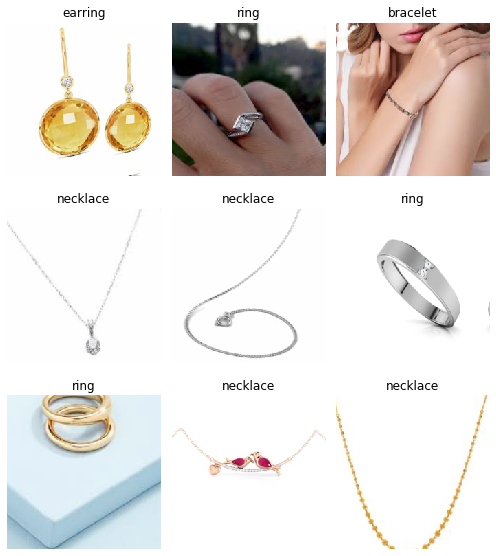

In [0]:
# Seeing sample of data
data.show_batch(rows = 3, figsize = (7,8))

In [0]:
# Create model
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [61]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.100816,0.320060,0.097643,02:43
1,0.605456,0.251557,0.070707,00:35
2,0.409535,0.202923,0.069024,00:34
3,0.291663,0.197698,0.060606,00:35


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


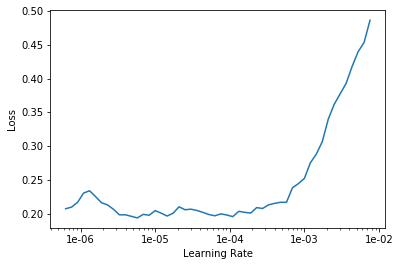

In [62]:
learn.unfreeze() # must be done before calling lr_find
# Using lr_find to find the best learning rate
learn.lr_find()
learn.recorder.plot()

In [63]:
# Fitting model with improved parameters
learn.fit_one_cycle(4, max_lr=slice(1e-4, 3e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.206160,0.256892,0.065657,00:34
1,0.199012,0.244724,0.060606,00:34
2,0.133156,0.133528,0.043771,00:34
3,0.081427,0.129033,0.042088,00:33


In [0]:
# ClassificationInterpretation provides a confusion matrix and visualization of the most incorrect images
interp = ClassificationInterpretation.from_learner(learn)

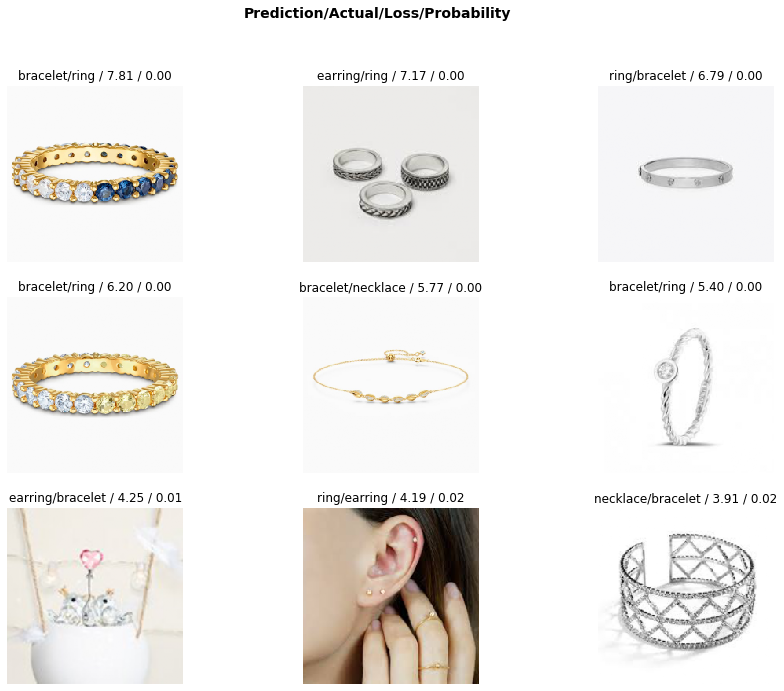

In [0]:
# Showing top loss images
interp.plot_top_losses(9, figsize=(15,11))

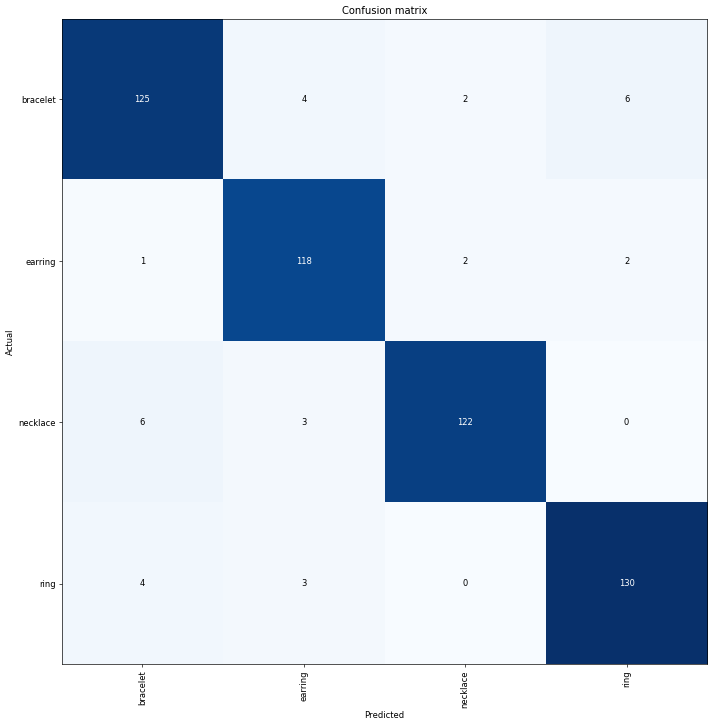

In [0]:
# Plotting confusion matrix
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [0]:
# Saving model
#learn.save("trained_model", return_path=True)

PosixPath('/content/drive/My Drive/Unit 6/Jewellery/models/trained_model.pth')

# Scraping Mejuri

In [53]:
# Loading model
learn = learn.load("trained_model")

RuntimeError: ignored

In [0]:
# Export model
learn.export('trained_model.pkl')

In [0]:
# Get predictions
learn.get_preds()

In [0]:
#soup = BeautifulSoup(page.content, 'html.parser')

In [64]:
!pip install requests_html
!pip install selenium

     |████████████████████████████████| 1.2MB 10.3MB/s 
     |████████████████████████████████| 81kB 10.0MB/s 
  Created wheel for parse: filename=parse-1.14.0-cp36-none-any.whl size=23463 sha256=c13382fe70f33658d4c92b64a55cd56e647eca3d13429bff384d0abe5035bfb7
  Stored in directory: /root/.cache/pip/wheels/d7/07/e0/b74bfdc1d434e73ef79e69e301e82a7825e0c070f7442beb61
  Created wheel for fake-useragent: filename=fake_useragent-0.1.11-cp36-none-any.whl size=13484 sha256=28075addc2a837a6764aca53c58aa58614b32dfc1339e0b082a9b5805ba8c6c8
  Stored in directory: /root/.cache/pip/wheels/5e/63/09/d1dc15179f175357d3f5c00cbffbac37f9e8690d80545143ff
  Created wheel for pyppeteer: filename=pyppeteer-0.0.25-cp36-none-any.whl size=78360 sha256=9e5cc5020e10bb38dc863dad6af123bf2add0ba65d89b84b034e1f79e654791e
  Stored in directory: /root/.cache/pip/wheels/34/e0/5d/070e22eceecf7ecd5fa4b86bbc18c1c7d0b90e02e9b57f35eb
Successfully built parse fake-useragent pyppeteer
     |████████████████████████████████| 91

In [0]:
# import libraries
import time
import pandas as pd
import requests

import urllib.request
from bs4 import BeautifulSoup

from selenium import webdriver
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By

import sys

In [0]:
#resp = requests.get("https://mejuri.com/shop/t/type/rings")

In [0]:
# html = resp.content
# soup = BeautifulSoup(html)

In [66]:
!apt-get update # to update ubuntu to correctly run apt install
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin

sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')
wd = webdriver.Chrome('chromedriver',chrome_options=chrome_options)
wd.get("https://mejuri.com/shop/t/type/")

Hit:1 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:2 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:3 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:4 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease [21.3 kB]
Get:5 http://ppa.launchpad.net/marutter/c2d4u3.5/ubuntu bionic InRelease [15.4 kB]
Get:6 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Get:7 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran35/ InRelease [3,626 B]
Ign:8 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:9 http://security.ubuntu.com/ubuntu bionic-security/universe amd64 Packages [823 kB]
Get:10 http://security.ubuntu.com/ubuntu bionic-security/restricted amd64 Packages [31.0 kB]
Get:11 http://security.ubuntu.com/ubuntu bionic-security/multiverse amd64 Packages [7,348 B]
Get:12 http://security.ubuntu.com/ubuntu bionic-security/main amd64 Packages [835 kB]
Get:13 htt

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: use options instead of chrome_options
  # Remove the CWD from sys.path while we load stuff.


In [0]:
# Lazyloading
# Get scroll height
last_height = wd.execute_script("return document.body.scrollHeight")
while True:
    # Scroll down to bottom
    wd.execute_script("window.scrollTo(0, document.body.scrollHeight);")
    # wait to load page
    time.sleep(30)
    # Calculate new scroll height and compare with last scroll height
    new_height = wd.execute_script("return document.body.scrollHeight")
    if new_height == last_height: # which means end of page
        break
    # update the last height
    last_height = new_height

In [0]:
# Wait for the dynamically loaded elements to show up
WebDriverWait(wd, 10).until(
    EC.visibility_of_element_located((By.CLASS_NAME, "category-products")))

# And grab the page HTML source
html_page = wd.page_source
wd.quit()

In [69]:
# Parse 
soup = BeautifulSoup(html_page)
soup.prettify

<bound method Tag.prettify of <html class="no-js wf-brandongrotesque-n7-active wf-brandongrotesque-n3-active wf-brandongrotesque-i3-active wf-brandongrotesque-n5-active wf-active" lang="en" style="--vh:6px;"><!--<![endif]--><head>
<meta charset="utf-8"/>
<meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/>
<script async="" src="https://www.googleadservices.com/pagead/conversion_async.js" type="text/javascript"></script><script async="" src="https://s.adroll.com/j/roundtrip.js" type="text/javascript"></script><script async="" src="https://s.pinimg.com/ct/lib/main.a37a8bbc.js"></script><script async="" src="https://www.google-analytics.com/gtm/js?id=GTM-M9399K7&amp;cid=34451245.1582489988" type="text/javascript"></script><script async="" src="https://cdn.heapanalytics.com/js/heap-2882297992.js" type="text/javascript"></script><script async="" src="https://www.googletagmanager.com/gtag/js?id=AW-793018154" type="text/javascript"></script><script async="" src="https://cdn.mousefl

In [70]:
# Get containers containing all necessary information of every jewellery piece
containers = soup.findAll("div",{'class':'category-product'}) ; containers

[<div class="category-product" data-material="14k Yellow Gold"><div class="category-product__container" data-hook="products_list_item" id="product_1475" itemscope="" itemtype="http://schema.org/Product"><div class="category-product__images"><a class="category-product__image-link category-shop-all" href="/shop/products/oversized-thin-hoops"><img alt="" class="category-product__image category-product__image--main lazyloaded" data-src="https://dto508s2j2p46.cloudfront.net/system/spree/products/6320/product/XLhoops.png?1546532178" data-srcset="https://dto508s2j2p46.cloudfront.net/system/spree/products/6320/small/XLhoops.png?1546532178 230w, https://dto508s2j2p46.cloudfront.net/system/spree/products/6320/product/XLhoops.png?1546532178 650w, https://dto508s2j2p46.cloudfront.net/system/spree/products/6320/large/XLhoops.png?1546532178 1500w" sizes="(min-width: 993px) 30vw, 50vw" src="https://dto508s2j2p46.cloudfront.net/system/spree/products/6320/product/XLhoops.png?1546532178" srcset="https:/

In [71]:
# Number of containers
len(containers)

331

In [74]:
earring_containers = containers.find(text = ['hoop','hoops','earrings','studs','stud','threaders','cuff'])
ring_containers = containers.find(text = ['ring','band','stacker','signet'])
necklace_containers = containers.find(text = ['necklace','choker','medallion','bold chain','flat chain','vermeil'])
bracelet_containers = containers.find(text = ['bracelet','bangle'])

AttributeError: ignored

In [0]:
# name of product
containers[0].div.h2.get_text()

# Price in USD
containers[0].div.p.get_text()

# Image of product
containers[0].div.div.a.img["src"]

# url to product
containers[0].div.div.a["href"]

'Stacker Ring'

In [0]:
containers[0].prettify

<bound method Tag.prettify of <div class="category-product" data-material="14k Yellow Gold"><div class="category-product__container" data-hook="products_list_item" id="product_1475" itemscope="" itemtype="http://schema.org/Product"><div class="category-product__images"><a class="category-product__image-link category-shop-all" href="/shop/products/oversized-thin-hoops"><img alt="" class="category-product__image category-product__image--main lazyloaded" data-src="https://dto508s2j2p46.cloudfront.net/system/spree/products/6320/product/XLhoops.png?1546532178" data-srcset="https://dto508s2j2p46.cloudfront.net/system/spree/products/6320/small/XLhoops.png?1546532178 230w, https://dto508s2j2p46.cloudfront.net/system/spree/products/6320/product/XLhoops.png?1546532178 650w, https://dto508s2j2p46.cloudfront.net/system/spree/products/6320/large/XLhoops.png?1546532178 1500w" sizes="(min-width: 993px) 30vw, 50vw" src="https://dto508s2j2p46.cloudfront.net/system/spree/products/6320/product/XLhoops.pn

In [0]:
# Separating the accessories by type 


In [0]:
prod_img = []
prod_name = []
prod_price = []
prod_link = []

In [0]:
# Name of the output file to write
#out_filename = "rings.csv"
# Header of csv file to be written
#headers = "prod_img, prod_name, prod_price, prod_link \n"

# Opens file, and writes headers
#f = open(out_filename, "w")
#f.write(headers)

for container in containers:
    # Grab name of product
    prod_name.append(container.div.h2.get_text())
    # Grab price of product in USD
    prod_price.append(container.div.p.get_text())
    # Grab picture of product
    prod_img.append(container.div.div.a.img["src"])
    # Grab link of product
    prod_link.append(container.div.div.a["href"])

    # Write dataset
    #f.write('prod_img' + "," + prod_name + "," + prod_price + "," + prod_link + "\n")

# Close the file
#f.close()

In [77]:
# Checking list of all images of products
prod_img

['https://dto508s2j2p46.cloudfront.net/system/spree/products/6320/product/XLhoops.png?1546532178',
 'https://dto508s2j2p46.cloudfront.net/system/spree/products/7854/product/large-hoops-cc.png?1559654753',
 'https://dto508s2j2p46.cloudfront.net/system/spree/products/7813/product/between-hoops-cc.png?1559245066',
 'https://dto508s2j2p46.cloudfront.net/system/spree/products/7879/product/small-hoops-cc.png?1559655859',
 'https://dto508s2j2p46.cloudfront.net/system/spree/products/9869/product/p52505557_Spiral_Earring_YG_both.png?1574627797',
 'https://dto508s2j2p46.cloudfront.net/system/spree/products/10046/product/bold-hoops-cc.png?1574720686',
 'https://dto508s2j2p46.cloudfront.net/system/spree/products/9910/product/sapphier-twin-hoops-cc.png?1574648256',
 'https://dto508s2j2p46.cloudfront.net/system/spree/products/9911/product/twin-hoops-cc.png?1574648289',
 'https://dto508s2j2p46.cloudfront.net/system/spree/products/9865/product/p52506267_Beaded_Hoops_YG_both.png?1574627595',
 'https://

In [78]:
len(prod_img)

331

In [0]:
columns = ['Name','Image','Price','Link']

In [80]:
string = 'mejuri.com'
prod_link_full = [string + x for x in prod_link]
print(prod_link_full)

['mejuri.com/shop/products/oversized-thin-hoops', 'mejuri.com/shop/products/large-hoops', 'mejuri.com/shop/products/between-hoops', 'mejuri.com/shop/products/small-hoops', 'mejuri.com/shop/products/spiral-earrings', 'mejuri.com/shop/products/bold-hoops', 'mejuri.com/shop/products/sapphire-twin-hoops', 'mejuri.com/shop/products/twin-hoops', 'mejuri.com/shop/products/beaded-hoops-2', 'mejuri.com/shop/products/turquoise-line-hoops', 'mejuri.com/shop/products/editor-hoops', 'mejuri.com/shop/products/boyfriend-hoops', 'mejuri.com/shop/products/boyfriend-mini-hoops', 'mejuri.com/shop/products/dome-hoops', 'mejuri.com/shop/products/croissant-dome-hoops', 'mejuri.com/shop/products/large-croissant-dome-hoops', 'mejuri.com/shop/products/curve-hoops', 'mejuri.com/shop/products/midi-hoops', 'mejuri.com/shop/products/crescent-midi-hoops', 'mejuri.com/shop/products/assembly-hoops', 'mejuri.com/shop/products/organic-pearl-hoops', 'mejuri.com/shop/products/organic-pearl-large-hoops', 'mejuri.com/shop/

In [81]:
product_df = pd.DataFrame(data = prod_name, columns= ['Name'])
product_df['Image'] = prod_img
product_df['Price'] = prod_price
product_df['Link'] = prod_link_full
product_df

,Name,Image,Price,Link
0,Oversized Thin Hoops,https://dto508s2j2p46.cloudfront.net/system/sp...,275,mejuri.com/shop/products/oversized-thin-hoops
1,Large Hoops,https://dto508s2j2p46.cloudfront.net/system/sp...,85,mejuri.com/shop/products/large-hoops
2,Between Hoops,https://dto508s2j2p46.cloudfront.net/system/sp...,65,mejuri.com/shop/products/between-hoops
3,Small Hoops,https://dto508s2j2p46.cloudfront.net/system/sp...,50,mejuri.com/shop/products/small-hoops
4,Spiral Earrings,https://dto508s2j2p46.cloudfront.net/system/sp...,125,mejuri.com/shop/products/spiral-earrings
...,...,...,...,...
326,Enamel Square Signet Silver,https://dto508s2j2p46.cloudfront.net/system/sp...,65,mejuri.com/shop/products/enamel-square-signet-...
327,Star Signet,https://dto508s2j2p46.cloudfront.net/system/sp...,60,mejuri.com/shop/products/star-signet
328,Honey Mini Signet,https://dto508s2j2p46.cloudfront.net/system/sp...,50,mejuri.com/shop/products/honey-signet
329,Travel Case,https://dto508s2j2p46.cloudfront.net/system/sp...,85,mejuri.com/shop/products/travel-case-beige


In [0]:
# Saving products to csv
product_df.to_csv(r'/content/drive/My Drive/Unit 6/Jewellery/product_df.csv')

In [0]:
# Read csv
product_file = '/content/drive/My Drive/Unit 6/Jewellery/product_df.csv'
product_df = pd.read_csv(product_file)
product_df.drop('Unnamed: 0', 1,inplace = True)

In [83]:
product_df

,Name,Image,Price,Link
0,Oversized Thin Hoops,https://dto508s2j2p46.cloudfront.net/system/sp...,275,mejuri.com/shop/products/oversized-thin-hoops
1,Large Hoops,https://dto508s2j2p46.cloudfront.net/system/sp...,85,mejuri.com/shop/products/large-hoops
2,Between Hoops,https://dto508s2j2p46.cloudfront.net/system/sp...,65,mejuri.com/shop/products/between-hoops
3,Small Hoops,https://dto508s2j2p46.cloudfront.net/system/sp...,50,mejuri.com/shop/products/small-hoops
4,Spiral Earrings,https://dto508s2j2p46.cloudfront.net/system/sp...,125,mejuri.com/shop/products/spiral-earrings
...,...,...,...,...
326,Enamel Square Signet Silver,https://dto508s2j2p46.cloudfront.net/system/sp...,65,mejuri.com/shop/products/enamel-square-signet-...
327,Star Signet,https://dto508s2j2p46.cloudfront.net/system/sp...,60,mejuri.com/shop/products/star-signet
328,Honey Mini Signet,https://dto508s2j2p46.cloudfront.net/system/sp...,50,mejuri.com/shop/products/honey-signet
329,Travel Case,https://dto508s2j2p46.cloudfront.net/system/sp...,85,mejuri.com/shop/products/travel-case-beige


In [0]:
img = []

In [0]:
from PIL import Image
import requests
from io import BytesIO

for url in product_df.Image:
  response = requests.get(url)
  img.append(Image.open(BytesIO(response.content)))

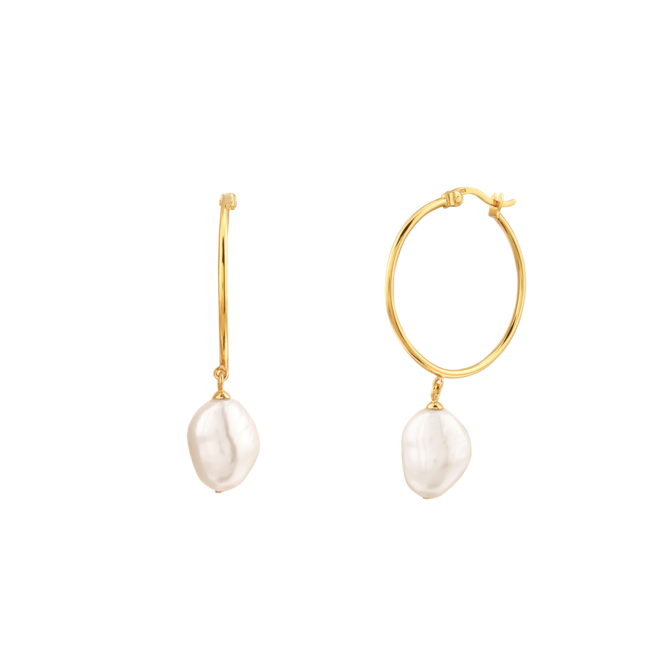

In [86]:
img[21]

# Hook


In [0]:
#hook class and fucntions
# Using Pytorch hooks to generate the feature vectors for all the images in train and valid dataset.
class Hook():
    def __init__(self, m:nn.Module, hook_func:HookFunc, is_forward:bool=True, detach:bool=True):
        self.hook_func,self.detach,self.stored = hook_func,detach,None
        f = m.register_forward_hook if is_forward else m.register_backward_hook
        self.hook = f(self.hook_fn)
        self.removed = False

    def hook_fn(self, module:nn.Module, input:Tensors, output:Tensors):
        if self.detach:
            input  = (o.detach() for o in input ) if is_listy(input ) else input.detach()
            output = (o.detach() for o in output) if is_listy(output) else output.detach()
        self.stored = self.hook_func(module, input, output)

    def remove(self):
        if not self.removed:
            self.hook.remove()
            self.removed=True

    def __enter__(self, *args): return self
    def __exit__(self, *args): self.remove()
        
def get_output(module, input_value, output):
    return output.flatten(1)

def get_input(module, input_value, output):
    return list(input_value)[0]

def get_named_module_from_model(model, name):
    for n, m in model.named_modules():
        if n == name:
            return m
    return None

In [0]:
data

ImageDataBunch;

Train: LabelList (2112 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
bracelet,bracelet,bracelet,bracelet,bracelet
Path: /content/drive/My Drive/Unit 6/Jewellery;

Valid: LabelList (528 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
ring,bracelet,earring,necklace,bracelet
Path: /content/drive/My Drive/Unit 6/Jewellery;

Test: None

In [0]:
model = learn.model
inference_data = data
inference_dataloader = inference_data.train_dl.new(shuffle=False)
linear_output_layer = get_named_module_from_model(model, '1.4')

In [0]:
import time
img_repr_map = {}

with Hook(linear_output_layer, get_output, True, True) as hook:
    start = time.time()
    for i, (xb, yb) in enumerate(inference_dataloader):
        bs = xb.shape[0]
        img_ids = inference_dataloader.items[i*bs: (i+1)*bs]
        result = model.eval()(xb)
        img_reprs = hook.stored.cpu().numpy()
        img_reprs = img_reprs.reshape(bs, -1)
        for img_id, img_repr in zip(img_ids, img_reprs):
            img_repr_map[img_id] = img_repr
        if(len(img_repr_map) % 710 == 0):
            end = time.time()
            print(f'{end-start} secs for 710 images')
            start = end

In [0]:
img_repr_df = pd.DataFrame(img_repr_map.items(), columns=['img_id', 'img_repr'])
img_repr_df['label'] = [inference_data.classes[x] for x in inference_data.train_ds.y.items[0:img_repr_df.shape[0]]]
img_repr_df['label_id'] = inference_data.train_ds.y.items[0:img_repr_df.shape[0]]

In [91]:
for x in img_repr_df.loc[0:5, 'img_id']:
  print(x)

/content/drive/My Drive/Unit 6/Jewellery/train/bracelet/bracelet_308.jpg
/content/drive/My Drive/Unit 6/Jewellery/train/bracelet/bracelet_057.jpg
/content/drive/My Drive/Unit 6/Jewellery/train/bracelet/bracelet_080.jpg
/content/drive/My Drive/Unit 6/Jewellery/train/bracelet/bracelet_123.jpg
/content/drive/My Drive/Unit 6/Jewellery/train/bracelet/bracelet_043.jpg
/content/drive/My Drive/Unit 6/Jewellery/train/bracelet/bracelet_094.jpg


In [92]:
pip install annoy

     |████████████████████████████████| 645kB 8.4MB/s 
  Created wheel for annoy: filename=annoy-1.16.3-cp36-cp36m-linux_x86_64.whl size=301847 sha256=e2fb7137b194243c44a7adde97f1b7d4b19741b039f4c998514a0d68325863e2
  Stored in directory: /root/.cache/pip/wheels/f3/01/54/6ef760fe9f9fc6ba8c19cebbe6358212b5f3b5b0195c0b813f
Successfully built annoy


In [0]:
from annoy import AnnoyIndex

feature_dim = len(img_repr_df['img_repr'][0])
t = AnnoyIndex(feature_dim, metric='euclidean')

for i, vector in enumerate(img_repr_df['img_repr']):
    t.add_item(i, vector)
    
_  = t.build(inference_data.c)

In [94]:
def get_similar_images_annoy(img_index):
    start = time.time()
    base_img_id, base_vector, base_label  = img_repr_df.iloc[img_index, [0, 1, 2]]
    similar_img_ids = t.get_nns_by_item(img_index, 13)
    end = time.time()
    print(f'{(end - start) * 1000} ms')
    return base_img_id, base_label, img_repr_df.iloc[similar_img_ids[1:]]
    
base_image, base_label, similar_images_df = get_similar_images_annoy(10)

2.032041549682617 ms


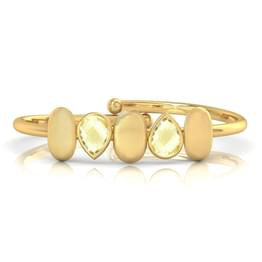

In [95]:
open_image(base_image)

In [96]:
similar_images_df.reset_index().iloc[0].img_id

PosixPath('/content/drive/My Drive/Unit 6/Jewellery/train/bracelet/bracelet_305.jpg')

In [0]:
similar_img_ids = t.get_nns_by_item(384, 4)

In [99]:
similar_img_ids

[384, 96, 100, 61]

In [100]:
x

PosixPath('/content/drive/My Drive/Unit 6/Jewellery/train/bracelet/bracelet_094.jpg')